# trim_nearby_peaks
an example for the use of porespy.filters.trim_nearby_peaks

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

In pairs of peaks that are closer to each other than they are to the solid phase, the peak closest to the solid is removed. 

Generate input values:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 15
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 57 iterations
Number of spheres inserted: 65
Final volume fraction: 0.5033888888888889


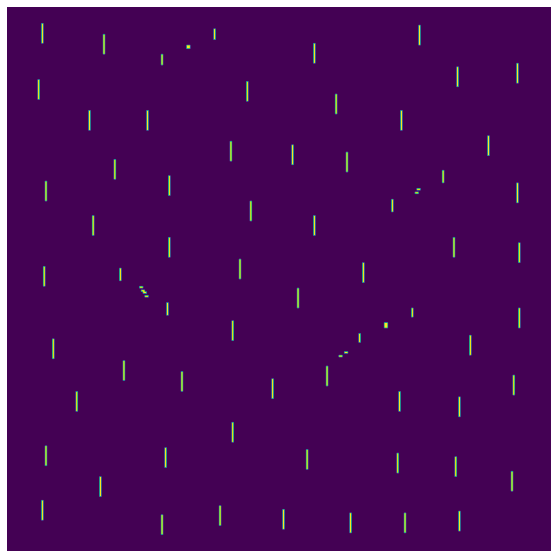

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(peaks)

Apply filter:

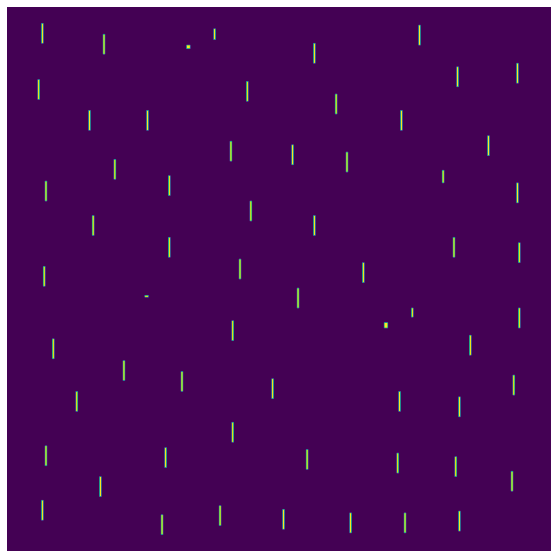

In [3]:
x = ps.filters.trim_nearby_peaks(peaks, dt)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(x)